# In class exercise1 : Life expectancy
Use the 'healthexp' dataset:

In [13]:
# import seaborn as sns
# healthexp = sns.load_dataset('healthexp')

And answer the following questions:

- What is the mean life expectancy in the US?

- What about Japan?

- Plot the development in health care spending for the US and Japan over time

- Plot the development in life expectancy for the US and Japan over time

- List all the unique countries in the data set. Rank them according to mean life expectancy and the mean health care spending

- Calculate the absolute (and percentage) change for health care spending and life expectancy from 1970 to 2020 for all countries (There is no data available for Canada in 1970)

In [26]:
import pandas as pd
healthexp = pd.read_csv('healthexp.csv')

# Exercise: What is the mean life expectancy in the US and Japan?

# Mean life expectancy = ある集団に属する個人の平均余命年数のことである。
# Calculate mean life expectancy for the US

mean_life_exp_us = healthexp[healthexp['Country'] == 'USA']['Life_Expectancy'].mean()
print(f"Mean Life Expectancy in the US: {mean_life_exp_us}")


# Calculate mean life expectancy for Japan

mean_life_exp_japan = healthexp[healthexp['Country'] == 'Japan']['Life_Expectancy'].mean()
print(f"Mean Life Expectancy in Japan: {mean_life_exp_japan}")

Mean Life Expectancy in the US: 75.84313725490196
Mean Life Expectancy in Japan: 79.5549019607843


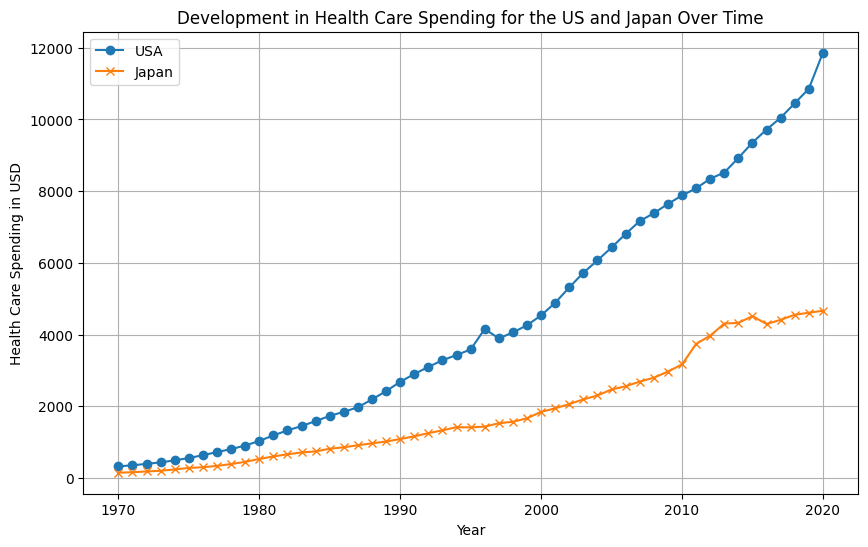

In [28]:
# Exercise: Plot the development in health care spending for the US and Japan over time
import matplotlib.pyplot as plt
import pandas as pd

# healthexp = pd.read_csv('healthexp.csv')

# Filter data for the US and Japan
us_data = healthexp[healthexp['Country'] == 'USA']
japan_data = healthexp[healthexp['Country'] == 'Japan']

# Plotting
# このコードは、Pythonのデータ可視化ライブラリであるMatplotlibを使用して、アメリカと日本の年間の医療費支出の推移をプロットしています。

# 1. `matplotlib.pyplot`と`pandas`ライブラリをインポートしています。
# 2. `healthexp = pd.read_csv('healthexp.csv')`は、CSVファイルからデータを読み込むためのコードです。
# 3. `healthexp`データフレームから、国が'USA'（アメリカ）または'Japan'（日本）であるデータをフィルタリングして、
# それぞれ`us_data`と`japan_data`に保存しています。
# 4. `plt.figure(figsize=(10, 6))`でプロットのサイズを設定しています。
# 5. `plt.plot()`関数を使用して、年（`Year`）に対する医療費支出（`Spending_USD`）をプロットしています。
# アメリカと日本はそれぞれ異なるマーカー（'o'と'x'）で表示されます。
# 6. グラフのタイトル、x軸とy軸のラベル、凡例を設定しています。
# 7. `plt.grid(True)`でグリッド線を表示しています。
# 8. 最後に`plt.show()`でグラフを表示しています。

# legend()関数は、Matplotlibのプロットに凡例（legend）を追加するための関数です。
# 凡例は、プロット内の各線やマーカーが何を表しているのかを説明するためのテキストとシンボルの組み合わせです。

plt.figure(figsize=(10, 6))
plt.plot(us_data['Year'], us_data['Spending_USD'], label='USA', marker='o')
plt.plot(japan_data['Year'], japan_data['Spending_USD'], label='Japan', marker='x')

plt.title('Development in Health Care Spending for the US and Japan Over Time')
plt.xlabel('Year')
plt.ylabel('Health Care Spending in USD')
plt.legend()
plt.grid(True)
plt.show()

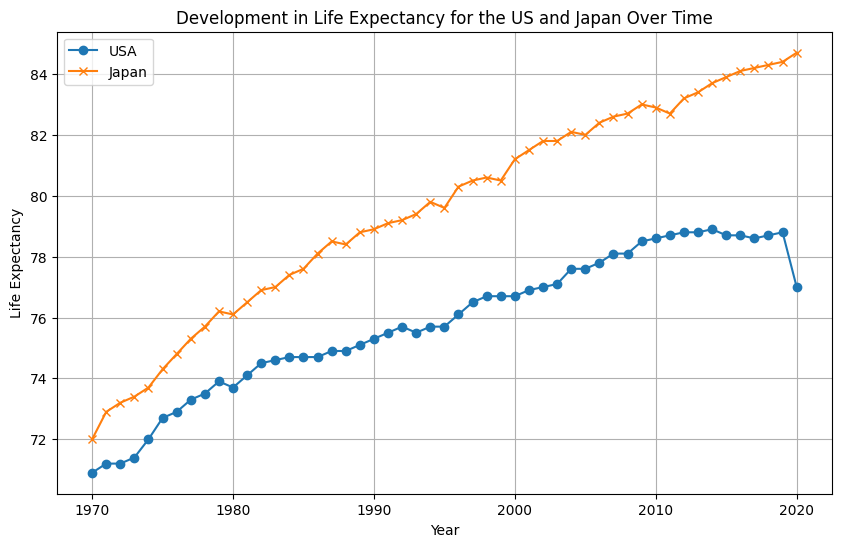

In [29]:
# Exercise: Plot the development in life expectancy for the US and Japan over time

import matplotlib.pyplot as plt
import pandas as pd

# Filter data for the US and Japan
us_data = healthexp[healthexp['Country'] == 'USA']
japan_data = healthexp[healthexp['Country'] == 'Japan']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(us_data['Year'], us_data['Life_Expectancy'], label='USA', marker='o')
plt.plot(japan_data['Year'], japan_data['Life_Expectancy'], label='Japan', marker='x')

plt.title('Development in Life Expectancy for the US and Japan Over Time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend()
plt.grid(True)
plt.show()


In [34]:
# Exercise: List all the unique countries in the data set. 
# Rank them according to mean life expectancy and the mean health care spending

import pandas as pd

# List unique countries
# `unique()`関数は、PandasのDataFrameまたはSeriesオブジェクトに対して使用され、
# 指定された列またはSeries内の一意（重複しない）な値を抽出します。
# この関数は、データセット内で特定の列に存在する一意な値を知りたい場合に非常に便利です。
# この関数は、データ分析においてカテゴリー変数の一意なレベルを調査する際や、特定の列にどのような一意な値が存在するのかを確認する際によく使用されます。

unique_countries = healthexp['Country'].unique()
print("Unique Countries:")
print(unique_countries)

# Calculate mean life expectancy and mean health care spending for each country
mean_values = healthexp.groupby('Country').mean()

# Rank countries by mean life expectancy
# 平均寿命によって降順に並べ替えている
ranked_by_life_expectancy = mean_values.sort_values(by='Life_Expectancy', ascending=False)
print("\nCountries Ranked by average Life Expectancy:")
print(ranked_by_life_expectancy['Life_Expectancy'])

# Rank countries by mean health care spending
# 平均医療費によって降順に並べ替えている
ranked_by_spending = mean_values.sort_values(by='Spending_USD', ascending=False)
print("\nCountries Ranked by average Health Care Spending:")
print(ranked_by_spending['Spending_USD'])



Unique Countries:
['Germany' 'France' 'Great Britain' 'Japan' 'USA' 'Canada']

Countries Ranked by average Life Expectancy:
Country
France           79.565714
Japan            79.554902
Canada           78.706818
Great Britain    77.620930
Germany          76.726000
USA              75.843137
Name: Life_Expectancy, dtype: float64

Countries Ranked by average Health Care Spending:
Country
USA              4388.570529
France           3045.145057
Canada           2685.778341
Germany          2667.280200
Great Britain    2034.192465
Japan            1860.257902
Name: Spending_USD, dtype: float64


In [37]:
# Exercise: Calculate the absolute (and percentage) change for health care spending and life expectancy
# from 1970 to 2020 for all countries (There is no data available for Canada in 1970)

# Filter data for the years 1970 and 2020
data_1970 = healthexp[healthexp['Year'] == 1970]
data_2020 = healthexp[healthexp['Year'] == 2020]

# Merge the two dataframes on 'Country'
# *なぜDataFrameに'Country'でmergeしたのか*: `pd.merge`関数を使用して'Country'でデータフレームを結合（merge）することで、
# 同じ国に関する1970年と2020年のデータを1つの行にまとめています。これにより、各国の健康支出(spending)と寿命(life expectancy)の変化を簡単に計算できます。
# 'Country'をキーとしてmergeすることで、データの整合性と分析の容易性が高まります。

# `suffixes`パラメータは、`pd.merge`関数内で使用され、結合する二つのデータフレームに同名の列が存在する場合に、
# それぞれの列名に追加する接尾辞（suffix）を指定します。このパラメータはタプル形式で提供され、
# 最初の接尾辞が左側（または第一引数）のデータフレームに、二つ目の接尾辞が右側（または第二引数）のデータフレームに適用されます。

# 例えば、このコードの文脈では、`data_1970`と`data_2020`の両方に`Spending_USD`と`Life_Expectancy`という列が存在します。
# `suffixes=('_1970', '_2020')`と指定することで、結合後のデータフレームでは
# これらの列が`Spending_USD_1970`, `Spending_USD_2020`, `Life_Expectancy_1970`, `Life_Expectancy_2020`といった形で区別されます。

merged_data = pd.merge(data_1970, data_2020, on='Country', suffixes=('_1970', '_2020'))

# Remove rows where data for Canada in 1970 is missing
merged_data = merged_data[merged_data['Country'] != 'Canada']

# Calculate absolute change for health care spending and life expectancy
# *Absolute Dataとは*: "Absolute data"とは、変化や比較ではなく、そのままの数値や状態を指すデータです。
# このコードの文脈では、`abs_change_spending`と`abs_change_life_expectancy`がそれに該当し、
# 1970年と2020年の間での健康支出と寿命の絶対的な変化（差）を計算しています。

merged_data['abs_change_spending'] = merged_data['Spending_USD_2020'] - merged_data['Spending_USD_1970']
merged_data['abs_change_life_expectancy'] = merged_data['Life_Expectancy_2020'] - merged_data['Life_Expectancy_1970']

# Calculate percentage change for health care spending and life expectancy
merged_data['perc_change_spending'] = (merged_data['abs_change_spending'] / merged_data['Spending_USD_1970']) * 100
merged_data['perc_change_life_expectancy'] = (merged_data['abs_change_life_expectancy'] / merged_data['Life_Expectancy_1970']) * 100

# Display the results
print("Absolute and Percentage Change for Health Care Spending and Life Expectancy from 1970 to 2020:")
print(merged_data[['Country', 'abs_change_spending', 'perc_change_spending', 'abs_change_life_expectancy', 'perc_change_life_expectancy']])

Absolute and Percentage Change for Health Care Spending and Life Expectancy from 1970 to 2020:
         Country  abs_change_spending  perc_change_spending  \
0        Germany             6686.672           2650.170623   
1         France             5276.275           2746.014687   
2  Great Britain             4894.707           3947.567201   
3          Japan             4515.204           3001.391945   
4            USA            11532.218           3527.092834   

   abs_change_life_expectancy  perc_change_life_expectancy  
0                        10.5                    14.872521  
1                        10.1                    13.988920  
2                         8.5                    11.821975  
3                        12.7                    17.638889  
4                         6.1                     8.603667  


# In class exercise2: Penguins dataset
## 1: Basic Analysis and Data Overview
Load the penguins dataset and display the first 10 rows.

Determine the number of rows and columns in the dataset.

Check for any missing values in the dataset.

## 2: Descriptive Statistics
Get the summary statistics for the numerical columns in the dataset.

Find the mean bill length of penguins.

## 3: Data Visualization
Create a histogram of the bill lengths of the penguins.

Plot a bar chart showing the number of penguins per species.

## 4: Data Filtering
Find the number of male penguins in the dataset.

Extract the records of penguins with a body mass greater than 4500 grams.

## 5: Data Aggregation
Find the average bill length for each species of penguin.